In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import statistics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
check= pd.read_csv('checkpoint_scores_durations_cleaned.csv')

In [ ]:
check

,student id,skill,score,quality score,problem solving score,technical score,checkpoint_duration,super skill
0,a8046ba0-675c-453c-802c-b25c42821a99,data-visualization,8.000000,7.0,9.0,8.0,191053.0,data-visualization
1,2bef53d1-628b-4807-ab54-b1d455ad517f,data-visualization,8.333333,8.0,9.0,8.0,175097.0,data-visualization
2,8c1fc1d5-e2b9-4c85-a9fc-87d6b225f996,data-visualization,7.000000,7.0,7.0,7.0,96802.0,data-visualization
3,592359a2-db7e-4eb3-9a8f-c7c62ffa1866,data-visualization,8.333333,8.0,9.0,8.0,349242.0,data-visualization
4,724429a8-bd0d-4797-a4af-eb427f618ea9,data-visualization,8.666667,9.0,8.0,9.0,26.0,data-visualization
...,...,...,...,...,...,...,...,...
476,aea3cb4c-df2c-4953-ab70-eb0aeed49d21,K Nearest Neighbor,5.000000,5.0,5.0,5.0,208737.0,supervised-machine-learning
477,8d3c26e6-1ff0-4062-a1d0-0f466121dad5,K Nearest Neighbor,9.000000,9.0,9.0,9.0,1099244.0,supervised-machine-learning
478,5418c688-13e6-4e27-a280-b5113a4d9715,K Nearest Neighbor,9.333333,10.0,9.0,9.0,142855.0,supervised-machine-learning
479,171832de-cbf6-415c-bef5-5206a463a5c9,K Nearest Neighbor,10.000000,10.0,10.0,10.0,90871.0,supervised-machine-learning


In [ ]:
check['unlock time']=pd.Series()
check['submission time']=pd.Series()
for i in range(check['unlock date'].shape[0]):
  check['unlock time'][i] =  datetime.strptime(check['unlock date'][i], '%Y-%m-%d %H:%M:%S')
  check['submission time'][i] =  datetime.strptime(check['submission date'][i], '%Y-%m-%d %H:%M:%S')
  check['unlock date'][i] =datetime.date(check['unlock time'][i])
  check['submission date'][i]=datetime.date(check['submission time'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
type(check['unlock date'][0])

datetime.date

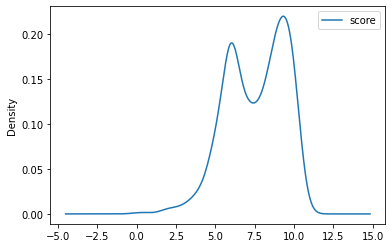

In [ ]:
check.plot.density(y='score')

In [ ]:
c=check[check['checkpoint_duration']< 1000000]
c['checkpoint_duration'].describe()

count       426.000000
mean     224842.077465
std      235576.325089
min          15.000000
25%       14373.750000
50%      135288.500000
75%      351552.250000
max      936050.000000
Name: checkpoint_duration, dtype: float64

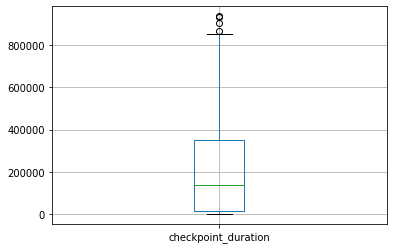

In [ ]:
c.boxplot(column=['checkpoint_duration'])

In [ ]:
c.corr()

,skill,score,quality score,problem solving score,technical score,checkpoint_duration,super skill
skill,1.000000,0.009817,0.005806,0.004365,0.018430,-0.029685,0.862318
score,0.009817,1.000000,0.975829,0.975254,0.979738,-0.123262,-0.007482
quality score,0.005806,0.975829,1.000000,0.924166,0.935636,-0.120085,-0.014617
problem solving score,0.004365,0.975254,0.924166,1.000000,0.935065,-0.119095,-0.017878
technical score,0.018430,0.979738,0.935636,0.935065,1.000000,-0.122047,0.010221
checkpoint_duration,-0.029685,-0.123262,-0.120085,-0.119095,-0.122047,1.000000,0.005276
super skill,0.862318,-0.007482,-0.014617,-0.017878,0.010221,0.005276,1.000000


In [ ]:
check_skill_score=c.groupby(['skill'])['score'].mean()
print(check_skill_score)

skill
0    7.700000
1    7.244792
2    7.672131
3    7.660606
4    7.606667
5    7.642276
6    7.577778
7    7.653333
Name: score, dtype: float64


as we have the lowest scores data-visualization/kmeans-unsupervised

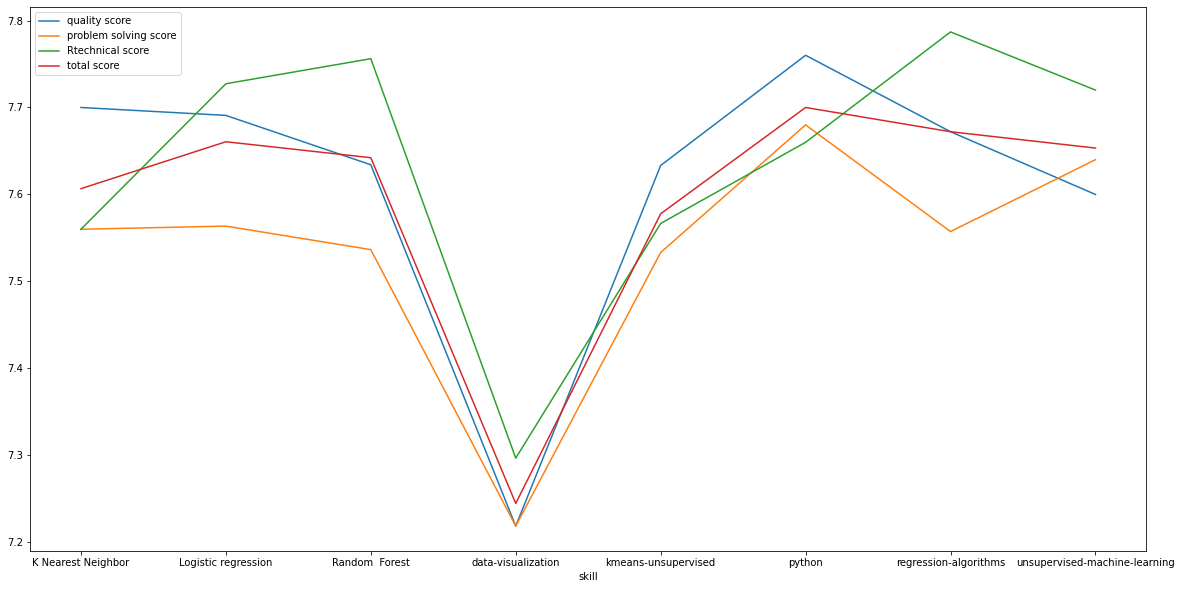

In [ ]:
plt.figure(figsize=(20,10))
c.groupby(['skill'])['quality score'].mean().plot(x='skill', y='quality score', rot=0,label='quality score')
c.groupby(['skill'])['problem solving score'].mean().plot(x='skill', y='quality score', rot=0,label='problem solving score')
c.groupby(['skill'])['technical score'].mean().plot(x='skill', y='quality score', rot=0,label='Rtechnical score')
c.groupby('skill')['score'].mean().plot(label='total score')
plt.legend()

the most technical problems we found it in dataviz and kmeans skill
also the instructors don't give credible scores 

depending to the vizualisations we have a problem in data viz and kmeans skills

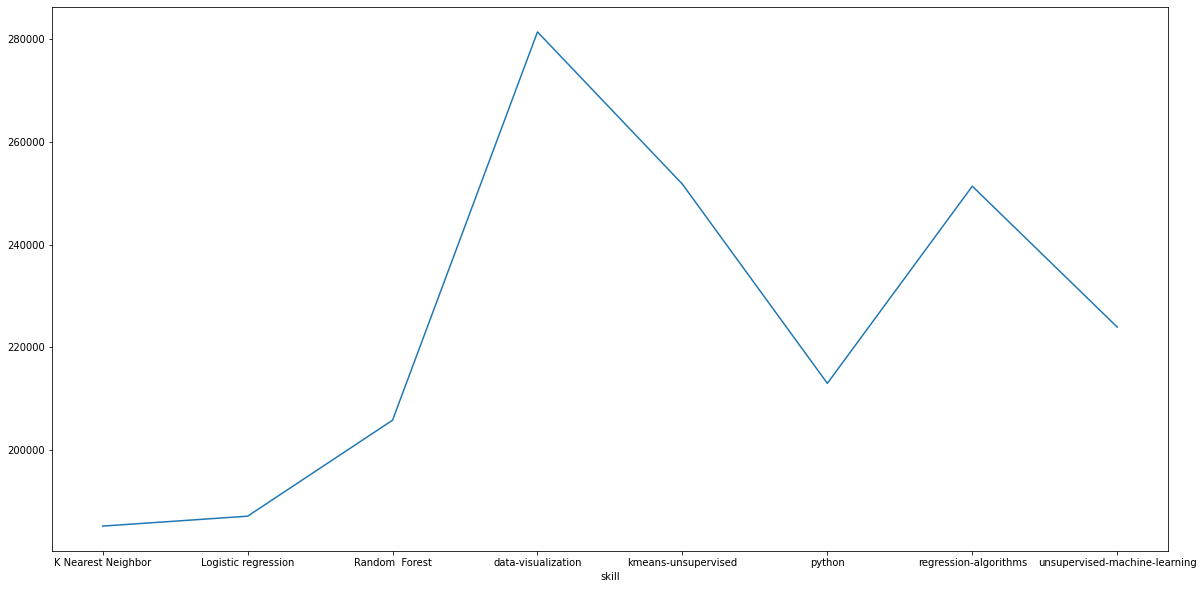

In [ ]:
c.groupby('skill')['checkpoint_duration'].mean().plot(figsize=(20,10))

In [ ]:
c=c[(c['checkpoint_duration']<2000000) & (c['score']>2)]
c.loc[c['checkpoint_duration']<=250000,'checkpoint_duration_class']=0
c.loc[(c['checkpoint_duration']>250000)&(c['checkpoint_duration']<750000),'checkpoint_duration_class']=1
c.loc[c['checkpoint_duration']>750000,'checkpoint_duration_class']=2

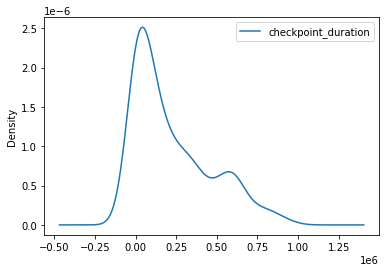

In [ ]:
c.plot.density(y='checkpoint_duration')

In [ ]:
c.score=c.score.round()
c['score_']=c.score
c

,student id,track,skill,score,quality score,problem solving score,technical score,unlock date,submission date,checkpoint_duration,super skill,unlock time,submission time,checkpoint_duration_class,score_
0,a8046ba0-675c-453c-802c-b25c42821a99,introduction-to-artificial-intelligence,1,8.0,7.0,9.0,8.0,2020-07-14,2020-07-16,191053.0,3,2020-07-14 09:52:59,2020-07-16 14:57:12,0.0,8.0
1,2bef53d1-628b-4807-ab54-b1d455ad517f,introduction-to-artificial-intelligence,1,8.0,8.0,9.0,8.0,2020-07-13,2020-07-15,175097.0,3,2020-07-13 08:49:20,2020-07-15 09:27:37,0.0,8.0
2,8c1fc1d5-e2b9-4c85-a9fc-87d6b225f996,introduction-to-artificial-intelligence,1,7.0,7.0,7.0,7.0,2020-07-13,2020-07-14,96802.0,3,2020-07-13 08:20:52,2020-07-14 11:14:14,0.0,7.0
3,592359a2-db7e-4eb3-9a8f-c7c62ffa1866,introduction-to-artificial-intelligence,1,8.0,8.0,9.0,8.0,2020-07-10,2020-07-14,349242.0,3,2020-07-10 08:48:29,2020-07-14 09:49:11,1.0,8.0
4,724429a8-bd0d-4797-a4af-eb427f618ea9,introduction-to-artificial-intelligence,1,9.0,9.0,8.0,9.0,2020-07-07,2020-07-07,26.0,3,2020-07-07 15:42:14,2020-07-07 15:42:40,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,6040c1f1-b8bd-45e3-8773-536aa47ce5d8,introduction-to-artificial-intelligence,4,9.0,9.0,9.0,9.0,2020-05-09,2020-05-09,21278.0,4,2020-05-09 14:53:26,2020-05-09 20:48:04,0.0,9.0
476,aea3cb4c-df2c-4953-ab70-eb0aeed49d21,introduction-to-artificial-intelligence,4,5.0,5.0,5.0,5.0,2020-05-10,2020-05-12,208737.0,4,2020-05-10 11:30:33,2020-05-12 21:29:30,0.0,5.0
478,5418c688-13e6-4e27-a280-b5113a4d9715,introduction-to-artificial-intelligence,4,9.0,10.0,9.0,9.0,2020-05-27,2020-05-29,142855.0,4,2020-05-27 23:27:08,2020-05-29 15:08:03,0.0,9.0
479,171832de-cbf6-415c-bef5-5206a463a5c9,introduction-to-artificial-intelligence,4,10.0,10.0,10.0,10.0,2020-05-29,2020-05-31,90871.0,4,2020-05-29 23:28:01,2020-05-31 00:42:32,0.0,10.0


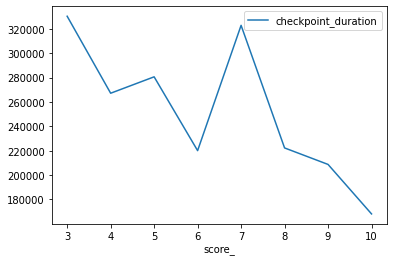

In [ ]:
c.groupby('score').mean().plot(kind='line', x='score_', y='checkpoint_duration')

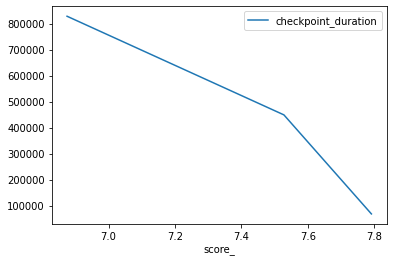

In [ ]:
c.groupby('checkpoint_duration_class').mean().plot(kind='line', x='score_', y='checkpoint_duration')

In [ ]:
import calendar
calendar.day_name[c.groupby('submission date').count().sort_values(by='student id').tail(20).index.values]

TypeError: ignored

In [ ]:
c.groupby('submission date').count().sort_values(by='student id').tail(20).index.values

array([datetime.date(2020, 7, 2), datetime.date(2020, 6, 19),
       datetime.date(2020, 5, 17), datetime.date(2020, 7, 9),
       datetime.date(2020, 6, 27), datetime.date(2020, 6, 25),
       datetime.date(2020, 6, 23), datetime.date(2020, 5, 9),
       datetime.date(2020, 7, 16), datetime.date(2020, 6, 11),
       datetime.date(2020, 4, 11), datetime.date(2020, 6, 29),
       datetime.date(2020, 7, 7), datetime.date(2020, 7, 15),
       datetime.date(2020, 3, 29), datetime.date(2020, 4, 4),
       datetime.date(2020, 7, 8), datetime.date(2020, 7, 13),
       datetime.date(2020, 6, 22), datetime.date(2020, 7, 14)],
      dtype=object)